In [4]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# --- Step 2: Extract uploaded ZIP file ---
zip_path = "/content/Stock Exchange Data.zip"  # Adjust if needed
extracted_path = "/content/stock_data"  # New directory for extracted files
os.makedirs(extracted_path, exist_ok=True)  # Create the directory if it doesn't exist
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Check extracted files
os.listdir(extracted_path)

# --- Step 3: Load dataset (adjust filename if needed) ---
# Replace with actual file name after checking extracted files, e.g., "Stock Exchange Data.csv"
file_path = os.path.join(extracted_path, "indexData.csv")  # Example filename, update if needed
df = pd.read_csv(file_path)

In [7]:
# --- Step 4: Basic Info ---
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe().T)


Shape of dataset: (112457, 11)
      Index       Date         Open         High          Low        Close  \
92450  N225 1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971   
92451  N225 1965-01-06  1263.989990  1263.989990  1263.989990  1263.989990   
92452  N225 1965-01-07  1274.270020  1274.270020  1274.270020  1274.270020   
92453  N225 1965-01-08  1286.430054  1286.430054  1286.430054  1286.430054   
92454  N225 1965-01-11          NaN          NaN          NaN          NaN   

         Adj Close  Volume  MA20  MA50  Daily Return  
92450  1257.719971     0.0   NaN   NaN           NaN  
92451  1263.989990     0.0   NaN   NaN      0.004985  
92452  1274.270020     0.0   NaN   NaN      0.008133  
92453  1286.430054     0.0   NaN   NaN      0.009543  
92454          NaN     NaN   NaN   NaN      0.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 112457 entries, 92450 to 106949
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ----

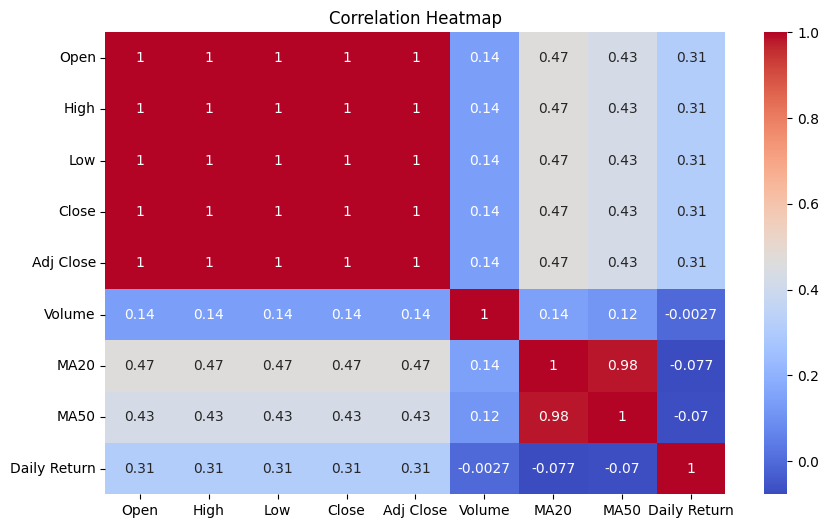

In [8]:
# --- Step 5: Correlation heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

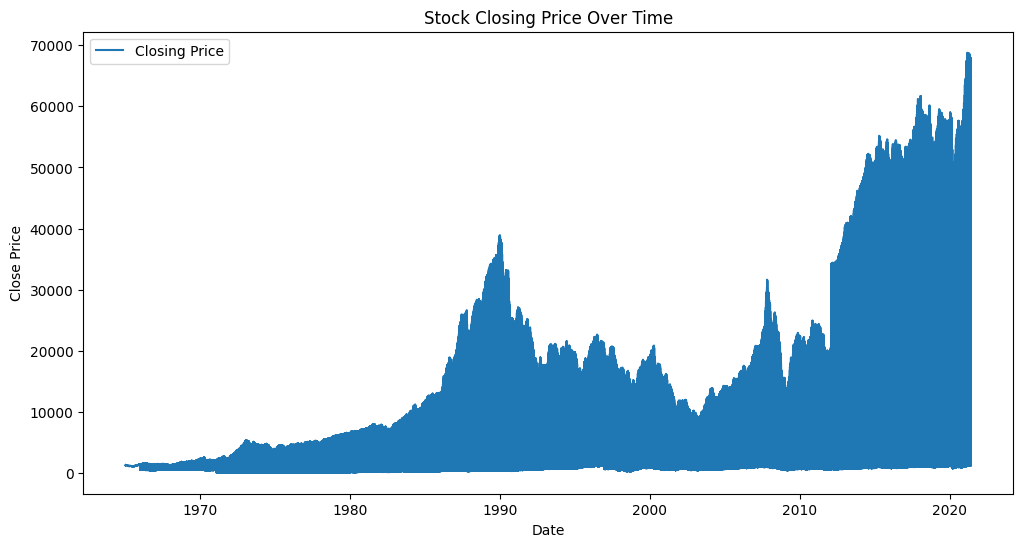

In [9]:
# --- Step 6: Price trends ---
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Close"], label="Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title("Stock Closing Price Over Time")
    plt.legend()
    plt.show()

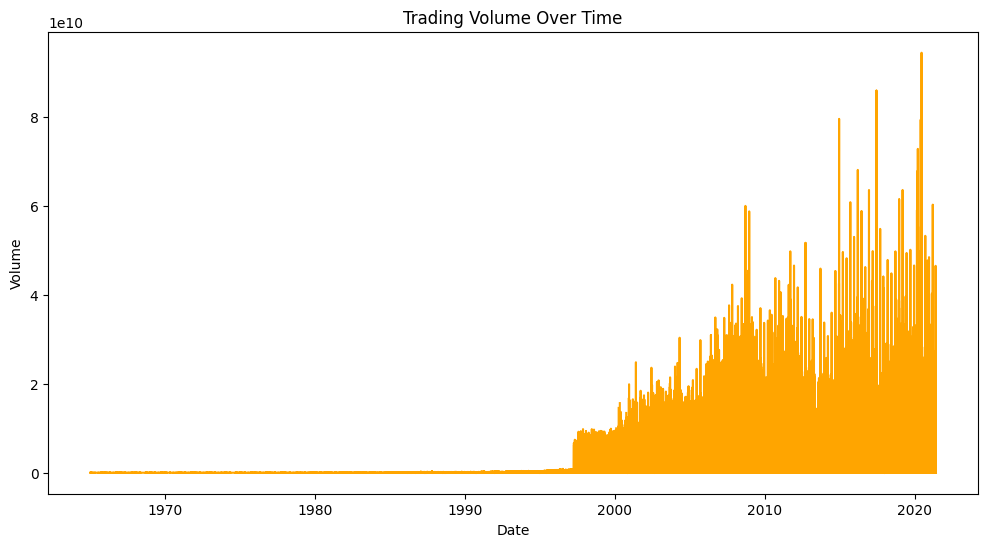

In [10]:
# --- Step 7: Volume analysis ---
if "Volume" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Volume"], color="orange")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.title("Trading Volume Over Time")
    plt.show()

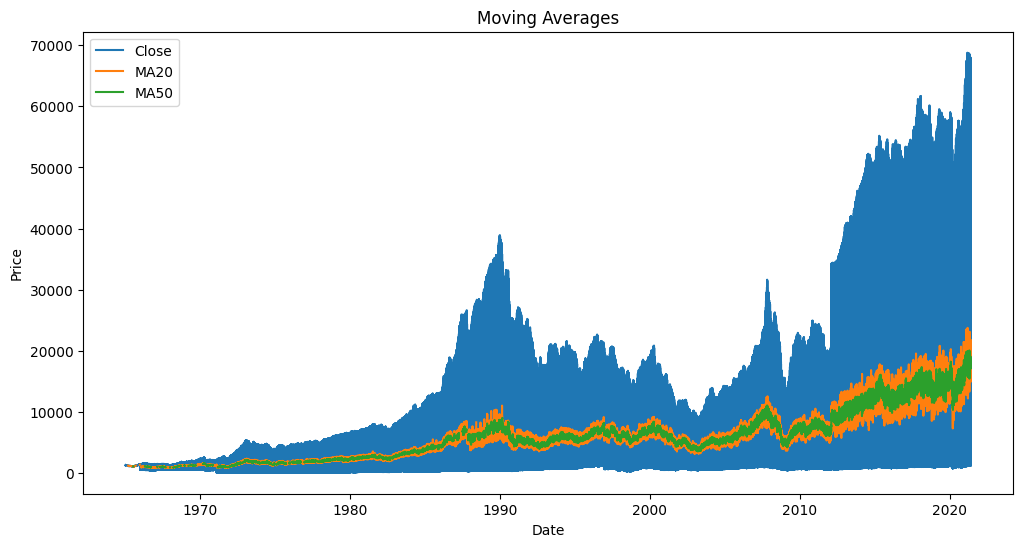

In [14]:
# --- Step 8: Moving averages ---
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["MA20"], label="MA20")
plt.plot(df["Date"], df["MA50"], label="MA50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Moving Averages")
plt.legend()
plt.show()


/tmp/ipython-input-2467238747.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Daily Return"] = df["Close"].pct_change()


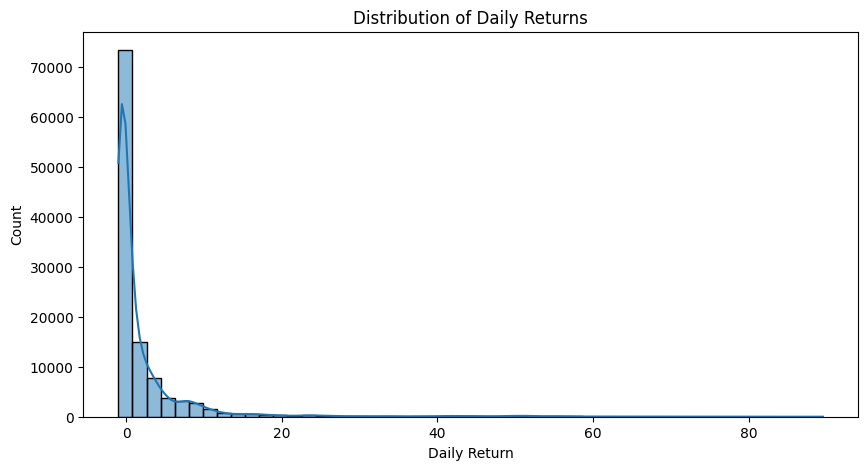

In [15]:
# --- Step 9: Daily returns ---
df["Daily Return"] = df["Close"].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

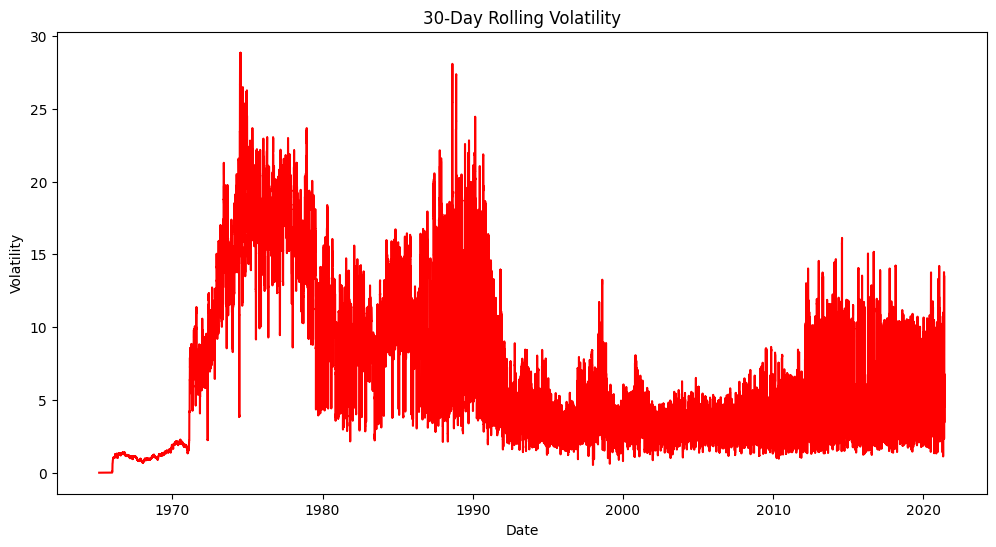

In [16]:
# --- Step 10: Volatility over time ---
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Daily Return"].rolling(window=30).std(), color="red")
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

Best day:
Date            1990-01-31 00:00:00
Daily Return              89.550154
Name: 98991, dtype: object

Worst day:
Date            1990-02-02 00:00:00
Daily Return              -0.988652
Name: 18747, dtype: object


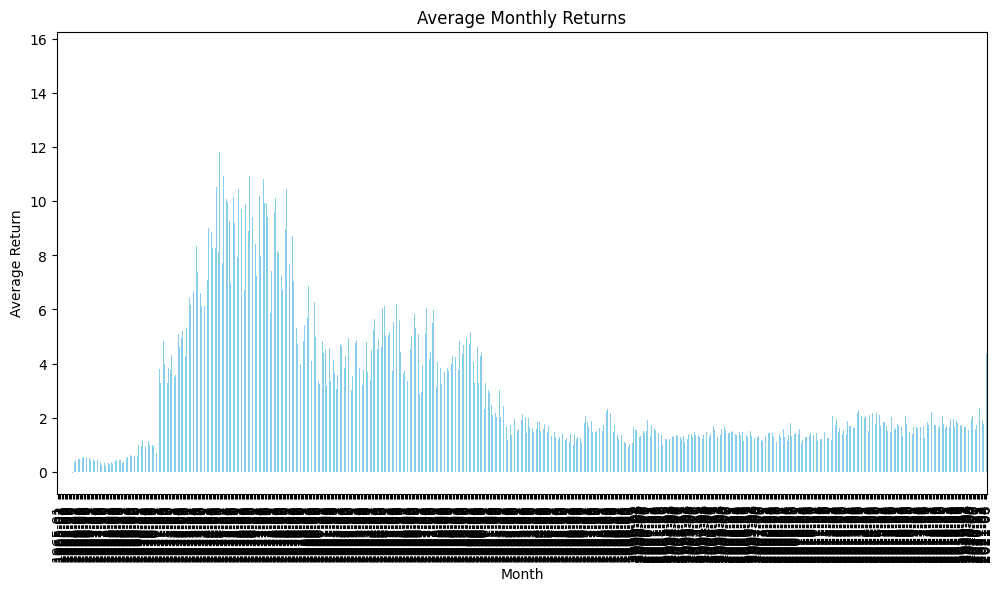

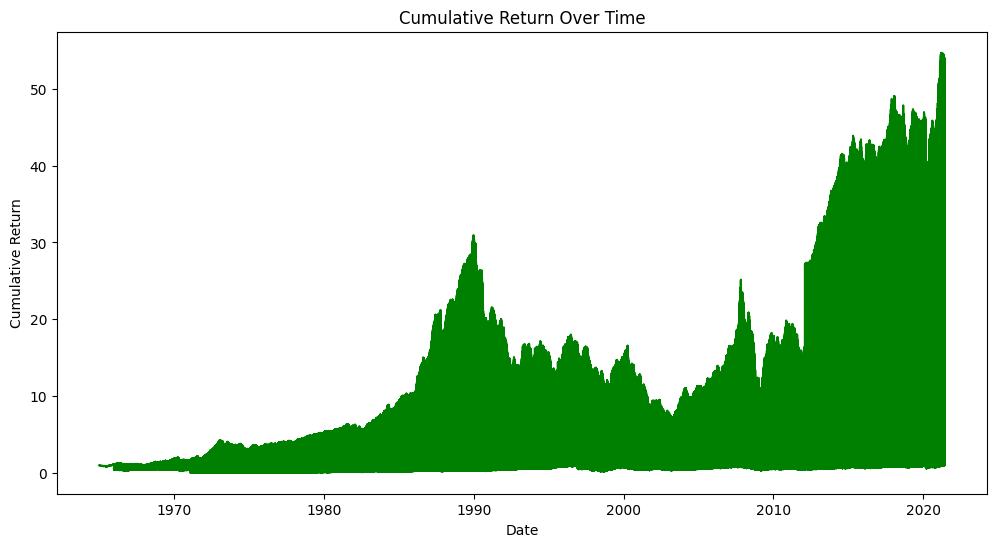

Sharpe Ratio: 4.964960753895578


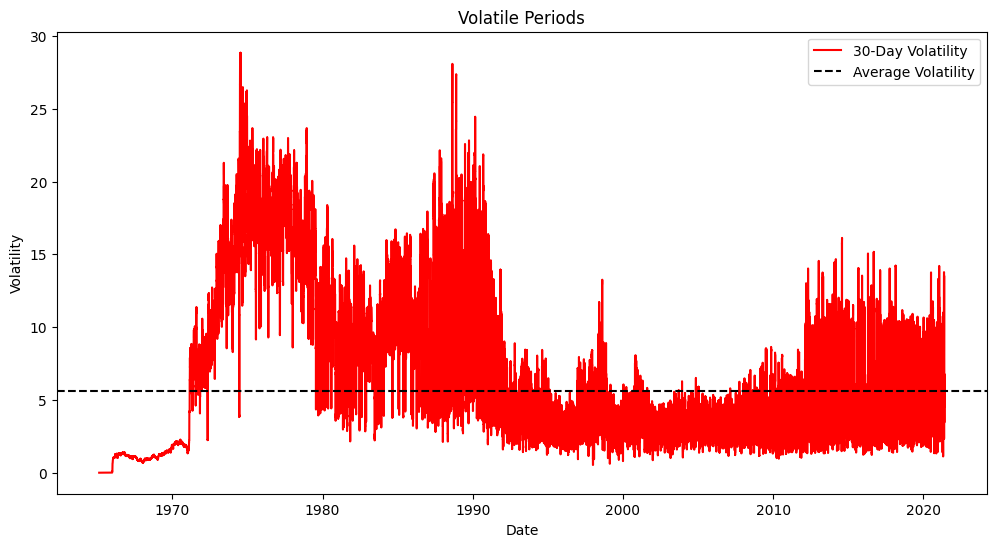


--- Trader Insights ---
Best day return: 8955.02% on 1990-01-31
Worst day return: -98.87% on 1990-02-02
Average daily return: 223.49%
Annualized volatility: 11343.58%
Sharpe Ratio: 4.96
Weak areas: periods with high volatility and negative average monthly returns


In [17]:
# --- Step 12: Best and worst days ---
best_day = df.loc[df["Daily Return"].idxmax()]
worst_day = df.loc[df["Daily Return"].idxmin()]

print("Best day:")
print(best_day[["Date", "Daily Return"]])
print("\nWorst day:")
print(worst_day[["Date", "Daily Return"]])

# --- Step 13: Average monthly returns ---
df["Month"] = df["Date"].dt.to_period("M")
monthly_returns = df.groupby("Month")["Daily Return"].mean()

plt.figure(figsize=(12,6))
monthly_returns.plot(kind="bar", color="skyblue")
plt.title("Average Monthly Returns")
plt.xlabel("Month")
plt.ylabel("Average Return")
plt.show()

# --- Step 14: Cumulative returns ---
df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod()

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Cumulative Return"], color="green")
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

# --- Step 15: Risk vs Reward (Sharpe Ratio) ---
# Assuming risk-free rate ~ 0 for simplicity
sharpe_ratio = df["Daily Return"].mean() / df["Daily Return"].std() * np.sqrt(252)
print("Sharpe Ratio:", sharpe_ratio)

# --- Step 16: Volatile periods detection ---
rolling_vol = df["Daily Return"].rolling(window=30).std()
high_vol = df[df["Daily Return"].rolling(window=30).std() > df["Daily Return"].rolling(window=30).std().mean()]

plt.figure(figsize=(12,6))
plt.plot(df["Date"], rolling_vol, label="30-Day Volatility", color="red")
plt.axhline(rolling_vol.mean(), color="black", linestyle="--", label="Average Volatility")
plt.title("Volatile Periods")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# --- Step 17: Summary insights ---
print("\n--- Trader Insights ---")
print(f"Best day return: {best_day['Daily Return']:.2%} on {best_day['Date'].date()}")
print(f"Worst day return: {worst_day['Daily Return']:.2%} on {worst_day['Date'].date()}")
print(f"Average daily return: {df['Daily Return'].mean():.2%}")
print(f"Annualized volatility: {df['Daily Return'].std() * np.sqrt(252):.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print("Weak areas: periods with high volatility and negative average monthly returns")


In [41]:
# Install dependencies (only once in Colab)
!pip install dash dash-bootstrap-components plotly

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

In [40]:
# --- Dashboard Layout ---
app = Dash(__name__, external_stylesheets=[dbc.themes.CYBORG])

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Stock Market EDA Dashboard", className="text-center mb-4"))),

    # Interactive Components Row
    dbc.Row([
        dbc.Col([
            html.Label("Select Stock Index:"),
            dcc.Dropdown(
                id="index-dropdown",
                options=[{"label": i, "value": i} for i in available_indices],
                value=available_indices[0],  # Default value
                clearable=False
            )
        ], md=4),
        dbc.Col([
            html.Label("Select Date Range:"),
            dcc.RangeSlider(
                id="date-range-slider",
                min=df["Date"].min().toordinal(),
                max=df["Date"].max().toordinal(),
                value=[df["Date"].min().toordinal(), df["Date"].max().toordinal()],
                marks={str(date.toordinal()): date.strftime("%Y-%m-%d")
                       for date in df["Date"][::len(df["Date"])//5].tolist()}, # Show 5 marks
                step=None
            )
        ], md=8),
    ], className="mb-4"), # Add margin bottom for spacing

    # Price and Volume Charts Row
    dbc.Row([
        dbc.Col(dcc.Graph(id="price-chart", figure=fig_price), md=6),
        dbc.Col(dcc.Graph(id="volume-chart", figure=fig_volume), md=6),
    ], className="mb-4"), # Add margin bottom for spacing

    # Moving Averages and Returns Charts Row
    dbc.Row([
        dbc.Col(dcc.Graph(id="ma-chart", figure=fig_ma), md=6),
        dbc.Col(dcc.Graph(id="returns-chart", figure=fig_returns), md=6),
    ], className="mb-4"), # Add margin bottom for spacing

    # Volatility and Cumulative Returns Charts Row
    dbc.Row([
        dbc.Col(dcc.Graph(id="volatility-chart", figure=fig_volatility), md=6),
        dbc.Col(dcc.Graph(id="cumret-chart", figure=fig_cumret), md=6),
    ], className="mb-4"), # Add margin bottom for spacing

     # RSI and MACD Charts Row
     dbc.Row([
        dbc.Col(dcc.Graph(id="rsi-chart", figure=fig_rsi), md=6), # Add RSI chart
        dbc.Col(dcc.Graph(id="macd-chart", figure=fig_macd), md=6), # Add MACD chart
    ], className="mb-4"), # Add margin bottom for spacing

    # Monthly Returns Chart Row
    dbc.Row(dbc.Col(dcc.Graph(id="monthly-chart", figure=fig_monthly), md=12), className="mb-4"), # Add margin bottom for spacing


    # Insights Row
    dbc.Row(dbc.Col(html.H4(f"""
        Insights:
        Best day return: {best_day['Daily Return']:.2%} on {best_day['Date'].date()} |
        Worst day return: {worst_day['Daily Return']:.2%} on {worst_day['Date'].date()} |
        Sharpe Ratio: {sharpe_ratio:.2f}
    """, className="text-center mt-4")))
], fluid=True)

# --- Callback function placeholder (will be implemented in a later step) ---
@app.callback(
    [Output('price-chart', 'figure'),
     Output('volume-chart', 'figure'),
     Output('ma-chart', 'figure'),
     Output('returns-chart', 'figure'),
     Output('volatility-chart', 'figure'),
     Output('cumret-chart', 'figure'),
     Output('monthly-chart', 'figure'),
     Output('rsi-chart', 'figure'),
     Output('macd-chart', 'figure')],
    [Input('index-dropdown', 'value'),
     Input('date-range-slider', 'value')]
)
def update_charts(selected_index, date_range):
    # Filtering logic and chart updates will go here
    pass
app.run(mode="inline")

<IPython.core.display.Javascript object>

## Summary:

### Data Analysis Key Findings

*   The dashboard layout was successfully updated to include a dropdown for selecting a stock index and a range slider for filtering by date.
*   Technical indicators including Bollinger Bands, RSI, and MACD were calculated and added to the DataFrame.
*   New charts were created to visualize the RSI and MACD, and the existing price chart was updated to include Bollinger Bands.
*   The dashboard layout was restructured to incorporate the new interactive components and charts, ensuring each component has a unique ID.

### Insights or Next Steps

*   The next crucial step is to implement the callback function that connects the interactive components (index dropdown and date range slider) to the charts, enabling dynamic filtering and updating of the visualizations based on user selections.
*   Consider adding more advanced technical indicators or visualizations to provide deeper insights into stock performance.
